In [1]:
import os
import sys
from datetime import datetime

import numpy as np
import pandas as pd

In [2]:
sys.path.append("../scripts")
import data
import bot
import reports
import model

In [3]:
import pandas as pd
import sklearn 
import scipy
import matplotlib.pyplot as plt

## Process New Inputs

In [4]:
os.chdir("../input")
os.listdir()

['.DS_Store', 'stmt.csv', 'currentTransaction_8522.csv']

In [5]:
bot.checking["files"], bot.credit["files"]

([PosixPath('../input/stmt.csv')],
 [PosixPath('../input/currentTransaction_8522.csv')])

In [6]:
#am.review_tags(am.tag_inputs(), threshold=.51, interactive=True)

In [7]:
output = bot.tag_inputs()
output.dtypes

date           datetime64[ns]
description            object
amount                float64
tags                   object
notes                  object
type                   object
check                 float64
dtype: object

In [8]:
# _, revised_output = model.review_tags(output, interactive=True)
# revised_output.dtypes

Interactive Mode
2 tags to review:

Probability 59.8684% transaction:
date                         2021-07-21 00:00:00
description    DUNKIN #340935 Q35 HIGHLAND PK NJ
amount                                     -3.93
tags                                        Food
notes                                           
type                                Cash Rewards
check                  24943001202837998796800.0
Name: 10, dtype: object
Suggestions:   ['Food' 'Work, Food' 'Vacation']


Press return to confirm or enter a new tag for the above transaction...
 


Probability 59.8921% transaction:
date                         2021-08-02 00:00:00
description    DUNKIN #340935 Q35 HIGHLAND PK NJ
amount                                     -6.26
tags                                        Food
notes                                           
type                                Cash Rewards
check                  24943001213838001438720.0
Name: 38, dtype: object
Suggestions:   ['Food' 'Work, Food' 'Vacation']


Press return to confirm or enter a new tag for the above transaction...
 


date           datetime64[ns]
description            object
amount                float64
tags                   object
notes                  object
type                   object
check                 float64
dtype: object

In [9]:
bot.process_inputs(True)

Interactive Mode
3 tags to review:

Probability 48.1096% transaction:
date                         2021-07-21 00:00:00
description    DUNKIN #340935 Q35 HIGHLAND PK NJ
amount                                     -3.93
tags                                  Work, Food
notes                                           
type                                Cash Rewards
check                  24943001202837998796800.0
Name: 10, dtype: object
Suggestions:   ['Work, Food' 'Food' 'Vacation']


Press return to confirm or enter a new tag for the above transaction...
 Food


Probability 48.0006% transaction:
date                         2021-08-02 00:00:00
description    DUNKIN #340935 Q35 HIGHLAND PK NJ
amount                                     -6.26
tags                                  Work, Food
notes                                           
type                                Cash Rewards
check                  24943001213838001438720.0
Name: 38, dtype: object
Suggestions:   ['Work, Food' 'Food' 'Vacation']


Press return to confirm or enter a new tag for the above transaction...
 Food


Probability 75.6862% transaction:
date                      2021-08-09 00:00:00
description    RITE AID 02561 HIGHLAND PARKNJ
amount                                 -23.11
tags                                Groceries
notes                                        
type                             Cash Rewards
check               24943001220838005407744.0
Name: 57, dtype: object
Suggestions:   ['Groceries' 'Food' 'Gift']


Press return to confirm or enter a new tag for the above transaction...
 


## Load model, compute summaries

In [4]:
source = data.load_source()
mlp = model.load_model()

In [5]:
monthly = reports.monthly_report(source)
yearly = reports.yearly_report(source)

### Monthly

In [38]:
monthly.loc["Netflow"].index.to_flat_index()

Index([ (2021, 8),  (2021, 7),  (2021, 6),  (2021, 5),  (2021, 4),  (2021, 3),
        (2021, 2),  (2021, 1), (2020, 12), (2020, 11), (2020, 10),  (2020, 9),
        (2020, 8),  (2020, 7),  (2020, 6),  (2020, 5),  (2020, 4),  (2020, 3),
        (2020, 2),  (2020, 1), (2019, 12), (2019, 11), (2019, 10),  (2019, 9),
        (2019, 8),  (2019, 7),  (2019, 6),  (2019, 5),  (2019, 4),  (2019, 3),
        (2019, 2),  (2019, 1), (2018, 12), (2018, 11), (2018, 10),  (2018, 9),
        (2018, 8),  (2018, 7),  (2018, 6),  (2018, 5),  (2018, 4),  (2018, 3),
        (2018, 2),  (2018, 1), (2017, 12), (2017, 11), (2017, 10),  (2017, 9),
        (2017, 8),  (2017, 7),  (2017, 6),  (2017, 5),  (2017, 4),  (2017, 3),
        (2017, 2),  (2017, 1)],
      dtype='object')

<AxesSubplot:xlabel='date,date'>

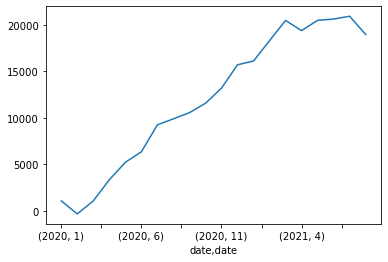

In [58]:
monthly[[2020,2021]].loc["Netflow"].sort_index().cumsum().plot()

<AxesSubplot:xlabel='date,date'>

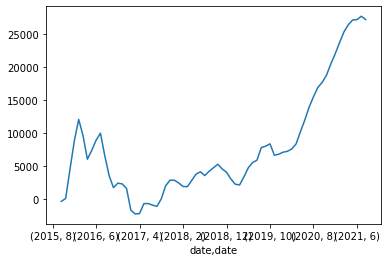

In [29]:
monthly.loc["Netflow"].sort_index().cumsum().rolling(3).mean().plot()

<AxesSubplot:xlabel='date,date'>

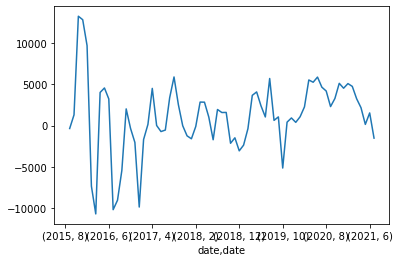

In [53]:
monthly.loc["Netflow"].sort_index().rolling(3, center=True).sum().plot()

<AxesSubplot:xlabel='date,date'>

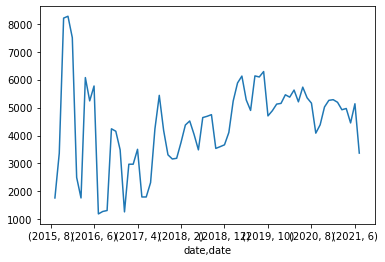

In [51]:
monthly.loc["Inflow"].sort_index().rolling(3, center=True).mean().plot()

<AxesSubplot:xlabel='date,date'>

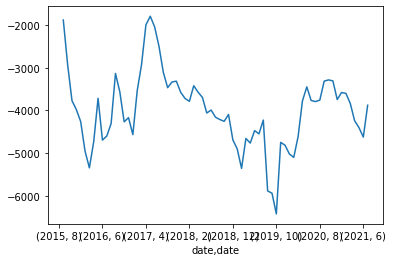

In [52]:
monthly.loc["Outflow"].sort_index().rolling(3, center=True).mean().plot()

<AxesSubplot:xlabel='date,date'>

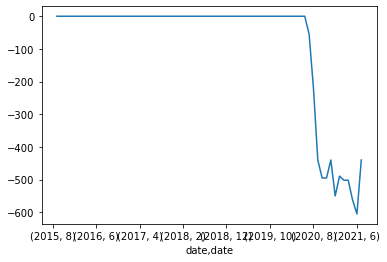

In [48]:
monthly.loc["Therapy"].sort_index().rolling(3, center=True).mean().plot()

In [37]:
this_month = (datetime.now().year,datetime.now().month)
last_month = (datetime.now().year,datetime.now().month - 1)
this_month = last_month
this_month

(2021, 7)

In [38]:
monthly[monthly!=0][this_month].dropna().sort_values()

tags
Outflow         -5625.15
Housing         -1554.00
Car              -744.64
Therapy          -660.00
Home             -617.19
Medical          -481.60
Food             -451.04
Groceries        -249.49
Charity          -200.59
Transition       -165.00
Utilities        -135.91
Cash             -120.00
Media            -110.32
Phone             -59.44
Gas               -46.14
Amazon            -25.54
Amazon, Media      -4.25
Clothing           70.00
Netflow           301.80
Income           5856.95
Inflow           5926.95
Name: (2021, 7), dtype: float64

In [40]:
cm = monthly[monthly!=0][this_month].dropna().sort_values()
cm_p = cm/cm.loc["Inflow"] * 100
cm_p.round(1)

tags
Outflow          -94.9
Housing          -26.2
Car              -12.6
Therapy          -11.1
Home             -10.4
Medical           -8.1
Food              -7.6
Groceries         -4.2
Charity           -3.4
Transition        -2.8
Utilities         -2.3
Cash              -2.0
Media             -1.9
Phone             -1.0
Gas               -0.8
Amazon            -0.4
Amazon, Media     -0.1
Clothing           1.2
Netflow            5.1
Income            98.8
Inflow           100.0
Name: (2021, 7), dtype: float64

### Yearly

In [27]:
yearly.loc["Netflow"]

date
2021     6090.64
2020    15699.26
2019     3107.03
2018     1052.07
2017     5310.00
Name: Netflow, dtype: float64

### Rolling Computations

In [52]:
s = source[(source.date.dt.month == this_month[1]) & (source.date.dt.year == this_month[0])]
summary = s.groupby("tags").sum().amount.sort_values()
summary.name = this_month[1]
summary

tags
Housing         -1554.00
Car              -744.64
Therapy          -660.00
Home             -617.19
Medical          -481.60
Food             -451.04
Groceries        -249.49
Charity          -200.59
Transition       -165.00
Utilities        -135.91
Cash             -120.00
Media            -110.32
Phone             -59.44
Gas               -46.14
Amazon            -25.54
Amazon, Media      -4.25
Bill                0.00
Clothing           70.00
Income           5856.95
Name: 7, dtype: float64

In [56]:
rolling_mean = monthly.rolling(3, center=True, min_periods=2, axis=1).mean().round(2)[2021]
rolling_mean[rolling_mean!=0].dropna(axis=0)

date,8,7,6,5,4,3,2,1
tags,,,,,,,,
Housing,-777.00,-777.00,-1036.00,-777.00,-777.00,-518.00,-768.00,-767.33
Car,-449.44,-505.06,-642.41,-581.97,-574.16,-571.49,-569.83,-560.30
Therapy,-412.50,-440.00,-605.00,-562.51,-501.89,-501.89,-489.39,-550.00
Home,-308.60,-210.14,-259.38,-53.65,-49.24,-44.48,-89.61,-89.61
Food,-298.34,-301.73,-384.70,-384.79,-362.83,-338.17,-220.21,-190.16
Groceries,-367.50,-265.22,-176.54,-157.66,-218.73,-145.57,-136.41,-94.09
Charity,-126.04,-141.52,-191.84,-238.72,-252.16,-260.92,-262.05,-302.63
Transition,-122.50,-220.67,-229.33,-251.33,-112.33,-128.67,-51.67,-73.32
Utilities,-67.96,-86.39,-132.19,-136.68,-150.22,-163.07,-209.18,-203.47


In [42]:
monthly.columns.names = ["year", "month"]
monthly.rolling(3, min_periods=2, axis=1).mean().round(2)

year          2021                                2020                    \
month           4        3        2        1        12       11       10   
tags                                                                       
Therapy        NaN  -660.00  -660.00  -660.00  -550.00  -440.00  -495.00   
Housing        NaN -1283.47  -855.64  -768.00  -767.33 -1063.33  -554.33   
Car            NaN  -521.64  -533.86  -569.83  -560.30  -556.15  -551.99   
Cash           NaN  -195.00  -130.00  -130.00   -33.33  -133.33  -153.33   
Costco         NaN  -187.36  -235.86  -267.57  -248.66  -137.71  -192.86   
Groceries      NaN  -173.50  -115.67  -136.41   -94.09  -186.71  -266.11   
Food           NaN  -242.46  -268.49  -220.21  -190.16  -186.38  -197.55   
Charity        NaN  -287.02  -270.92  -272.05  -312.63  -290.05  -228.82   
Media          NaN  -170.38  -185.10  -225.48  -179.04  -150.89   -93.42   
Utilities      NaN  -122.74  -140.48  -209.18  -203.47  -193.03  -143.91   
Phone          NaN   -59.46   -59.46   -59.44   -59.38   -59.31   -59.26   
Amazon         NaN   -13.85   -41.21   -41.21   -48.24   -65.85   -65.85   
Taxes          NaN     0.00     0.00     0.00     0.00     0.00     0.00   
Savings        NaN     0.00     0.00     0.00     0.00     0.00     0.00   
Transition     NaN   -38.50   -77.33   -51.67   -73.32   -29.46   -52.09   
Travel         NaN     0.00     0.00     0.00     0.00     0.00     0.00   
Personal       NaN     0.00     0.00     0.00     0.00     0.00     0.00   
Nasya          NaN     0.00     0.00     0.00     0.00     0.00     0.00   
Medical        NaN     0.00     0.00     0.00     0.00     0.00     0.00   
Vacation       NaN     0.00     0.00     0.00     0.00     0.00     0.00   
Vet            NaN     0.00     0.00     0.00     0.00     0.00     0.00   
Interest       NaN     0.00     0.00     0.00     0.00     0.00     0.00   
Student Loans  NaN     0.00     0.00     0.00     0.00     0.00     0.00   
HSA            NaN     0.00     0.00     0.00     0.00     0.00     0.00   
Home           NaN     0.00   -44.48   -89.61   -89.61   -45.13   -28.43   
Amazon, Media  NaN     0.00     0.00     0.00     0.00     0.00    -2.13   
Annuity        NaN     0.00     0.00     0.00     0.00     0.00     0.00   
Bank           NaN     0.00     0.00     0.00     0.00     0.00     0.00   
Beep Boop      NaN     0.00     0.00     0.00     0.00     0.00     0.00   
Bill           NaN     0.00     0.00     0.00     0.00     0.00     0.00   
Bonds          NaN     0.00     0.00     0.00     0.00     0.00     0.00   
Books          NaN     0.00     0.00     0.00   -48.66   -48.66   -48.66   
Dad            NaN     0.00     0.00     0.00     0.00     0.00     0.00   
Drugs          NaN     0.00     0.00     0.00     0.00     0.00     0.00   
Gas            NaN   -20.54   -13.70   -11.90   -11.90   -22.62   -10.72   
Gift           NaN     0.00     0.00     0.00    -1.38    -1.38    -1.38   
Gifts          NaN     0.00     0.00   -33.32   -46.06   -96.04   -62.72   
Work, Commute  NaN     0.00     0.00     0.00     0.00     0.00     0.00   
Clothing       NaN   -65.50   -68.17   -24.50   -61.83   -37.33   -88.00   
Work, Food     NaN     0.00     0.00     0.00     0.00     0.00   -10.63   
Income         NaN  4222.42  4550.77  5359.72  5282.05  5258.61  5021.19   
Inflow         NaN  4222.42  4550.77  5359.72  5282.05  5258.61  5021.19   
Outflow        NaN -4041.40 -3700.35 -3770.38 -3579.40 -3743.38 -3307.22   
Netflow        NaN   181.02   850.42  1589.35  1702.65  1515.24  1713.97   

year                                      ...     2016                    \
month               9        8        7   ...       5        4        3    
tags                                      ...                              
Therapy        -495.00  -440.00  -220.00  ...     0.00     0.00     0.00   
Housing        -555.00  -534.00 -1359.00  ...  -666.67  -300.00  -300.00   
Car            -574.56  -574.55  -574.55  ...  

### Sampling

In [8]:
tags = ["Transition", "Medical", "Therapy"]
source.loc[tags][2021]

tags
Transition    -232.0
Medical          0.0
Therapy      -2475.0
Name: 2021, dtype: float64

### Percentages of Income

In [56]:
total = yearly.sum(axis=1)
tp = total/total.loc["Inflow"] * 100
tp.sort_values()

tags
Outflow          -91.687813
Housing          -27.604766
Groceries         -9.910293
Transition        -9.318281
Car               -6.705170
Food              -5.601262
Student Loans     -3.319889
Medical           -2.777800
Utilities         -2.702499
Costco            -2.423957
Cash              -2.335281
Amazon            -1.859833
Media             -1.673096
Phone             -1.575671
Home              -1.509911
Gas               -1.499800
Work, Commute     -1.340862
Therapy           -1.109510
Clothing          -0.995802
Vet               -0.858004
Personal          -0.852009
Charity           -0.822875
Vacation          -0.789451
Work, Food        -0.774686
Taxes             -0.661682
Gifts             -0.433675
Drugs             -0.412979
Savings           -0.368067
Travel            -0.138538
Beep Boop         -0.059991
Books             -0.051664
Bank              -0.038983
Interest          -0.032379
Amazon, Media     -0.008271
Gift              -0.001465
Bill           

In [15]:
monthly[monthly < 0]/monthly.loc["Outflow"]

date               2021      2020                                          \
date                 1         12        11        10        9         8    
tags                                                                        
Housing        0.221404  0.223955  0.252978       NaN  0.229024  0.229476   
Car            0.159086  0.163068  0.155507  0.184965  0.186285  0.151821   
Therapy        0.141049  0.143042  0.094012  0.223658  0.145903  0.045895   
Charity        0.101242  0.099563  0.048704  0.057934  0.050391  0.047553   
Costco         0.051989  0.066658       NaN  0.117898       NaN  0.095765   
Food           0.027762  0.044066  0.088089  0.044379  0.063089  0.046624   
Utilities      0.081974  0.042413  0.041203  0.047554  0.042848  0.041370   
Books               NaN  0.042184       NaN       NaN       NaN       NaN   
Groceries      0.047119  0.033781  0.079164  0.136756  0.032635  0.084250   
Clothing            NaN  0.032365       NaN  0.051509       NaN       NaN   
Cash                NaN  0.028897  0.085465  0.020333       NaN       NaN   
Media          0.070259  0.021768  0.037069  0.025348  0.017299  0.028697   
Transition          NaN  0.018775  0.006666  0.023013  0.028405  0.048279   
Phone          0.016932  0.017125  0.016882  0.020082  0.038097       NaN   
Gifts          0.028480  0.011047  0.042716       NaN  0.058951       NaN   
Amazon         0.003947  0.010097  0.042382  0.004693  0.004082  0.133983   
Gift                NaN  0.001196       NaN       NaN       NaN       NaN   
Medical             NaN       NaN       NaN       NaN       NaN       NaN   
Taxes               NaN       NaN       NaN       NaN       NaN       NaN   
Student Loans       NaN       NaN       NaN       NaN       NaN       NaN   
Travel              NaN       NaN       NaN       NaN       NaN       NaN   
Savings             NaN       NaN       NaN       NaN       NaN       NaN   
Vacation            NaN       NaN       NaN       NaN       NaN       NaN   
Personal            NaN       NaN       NaN       NaN       NaN       NaN   
Vet                 NaN       NaN       NaN       NaN       NaN       NaN   
Nasya               NaN       NaN       NaN       NaN       NaN       NaN   
HSA                 NaN       NaN       NaN       NaN       NaN       NaN   
Home           0.038582       NaN       NaN  0.028903  0.050671  0.046287   
Work, Commute       NaN       NaN       NaN       NaN       NaN       NaN   
Gas            0.010175       NaN  0.009162       NaN       NaN       NaN   
Drugs               NaN       NaN       NaN       NaN       NaN       NaN   
Dad                 NaN       NaN       NaN       NaN       NaN       NaN   
Bonds               NaN       NaN       NaN       NaN       NaN       NaN   
Bill                NaN       NaN       NaN       NaN       NaN       NaN   
Beep Boop           NaN       NaN       NaN       NaN  0.049964       NaN   
Bank                NaN       NaN       NaN       NaN       NaN       NaN   
Annuity             NaN       NaN       NaN       NaN       NaN       NaN   
Amazon, Media       NaN       NaN       NaN  0.002165  0.002355       NaN   
Interest            NaN       NaN       NaN       NaN       NaN       NaN   
Work, Food          NaN       NaN       NaN  0.010810       NaN       NaN   
Income              NaN       NaN       NaN       NaN       NaN       NaN   
Inflow              NaN       NaN       NaN       NaN       NaN       NaN   
Outflow        1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
Netflow        0.244681       NaN       NaN       NaN       NaN       NaN   

date                                                   ...      2016  \
date                 7         6         5         4   ...        5    
tags                                                   ...             
Housing        0.578079  0.471667  0.469221  0.495631  ...       NaN   
Car            0.127486  0.157857  0.157038  0.165877  ...  0.003951   
Therapy             

### Insurance Computations

In [ ]:
# $1,768 in Insurance Premiums
# $300   in Dental    Premiums

In [7]:
power = source[(source.description.str.contains("PSEG")) & (source.date >= '2019-02-01') & (source.date <= '2021-09-01')]
power.sort_values(by=["tags", "date"])

,date,description,amount,tags,notes,type,check
2459,2019-03-12,PUBLIC SERVICE DES:PSEG ID:XXXXX6869809 INDN:T...,-30.00,Utilities,,Checking,3238.00
2519,2019-04-10,PUBLIC SERVICE DES:PSEG ID:XXXXX6869809 INDN:T...,-63.00,Utilities,,Checking,3257.00
2595,2019-05-10,PUBLIC SERVICE DES:PSEG ID:XXXXX6869809 INDN:T...,-54.20,Utilities,,Checking,3276.00
2684,2019-06-10,PUBLIC SERVICE DES:PSEG ID:XXXXX6869809 INDN:T...,-48.55,Utilities,,Checking,3297.00
2752,2019-07-10,PUBLIC SERVICE DES:PSEG ID:XXXXX6869809 INDN:T...,-50.05,Utilities,,Checking,3314.00
2823,2019-08-09,PUBLIC SERVICE DES:PSEG ID:XXXXX6869809 INDN:T...,-56.09,Utilities,,Checking,3330.00
2886,2019-09-09,PUBLIC SERVICE DES:PSEG ID:XXXXX6869809 INDN:T...,-59.38,Utilities,,Checking,3351.00
2967,2019-10-09,PUBLIC SERVICE DES:PSEG ID:XXXXX6869809 INDN:T...,-53.22,Utilities,,Checking,3373.00
3050,2019-11-07,PUBLIC SERVICE DES:PSEG ID:XXXXX6869809 INDN:T...,-46.44,Utilities,,Checking,3397.00
3115,2019-12-06,PUBLIC SERVICE DES:PSEG ID:XXXXX6869809 INDN:T...,-79.55,Utilities,,Checking,3421.00


In [11]:
power.amount.describe()

count     29.000000
mean     -69.734828
std       18.631573
min     -108.170000
25%      -80.940000
50%      -68.120000
75%      -55.740000
max      -30.000000
Name: amount, dtype: float64

In [9]:
spring_summer = [4,5,6,7,8]
power.groupby(power.date.dt.month.isin(spring_summer)).amount.mean()

date
False   -76.979333
True    -61.972857
Name: amount, dtype: float64

In [26]:
ins_year.groupby("tags").sum()

,amount,check
tags,,
Medical,-15.98,1.683000e+03
Therapy,-3300.00,4.585591e+05
Transition,-993.03,2.439358e+23


In [14]:
mlp.steps

[('column_trans',
  ColumnTransformer(transformers=[('description',
                                   TfidfVectorizer(ngram_range=(1, 2)),
                                   'description'),
                                  ('amount', StandardScaler(), ['amount']),
                                  ('type', OrdinalEncoder(), ['type'])])),
 ('mlp', MLPClassifier(hidden_layer_sizes=(250, 250)))]

In [20]:
mlp.classes_

array(['Amazon', 'Amazon, Media', 'Beep Boop', 'Bill', 'Books', 'Car',
       'Cash', 'Charity', 'Clothing', 'Costco', 'Drugs', 'Food', 'Gas',
       'Gift', 'Gifts', 'Groceries', 'HSA', 'Home', 'Housing', 'Income',
       'Media', 'Medical', 'Nasya', 'Phone', 'Savings', 'Student Loans',
       'Taxes', 'Therapy', 'Transition', 'Utilities', 'Vacation', 'Vet',
       'Work, Commute', 'Work, Food'], dtype='<U13')

In [31]:
encoder, clf = list(mlp.named_steps.values())
tfidf = list(encoder.named_transformers_.values())[0]

In [143]:
training_source = source[source.date.dt.year >= 2019]
sparse_features = encoder.transform(training_source)
df = pd.DataFrame(sparse_features.toarray()[:,:-2], columns=tfidf.get_feature_names(), index=training_source.index)
df["tags"] = training_source.tags
df.index = training_source.description

In [144]:
df

,0000,0000 indn,000000000000004999,0000000604487435000000,0000000604487435000000 co,000001918,000001918 withdrwl,000002001,000002001 withdrwl,000002700,...,york ny,york times,you,zc9de2xo3,zc9de2xo3 amzn,zelle,zelle transfer,zf6xd49y3,zf6xd49y3 888,tags
description,,,,,,,,,,,,,,,,,,,,,
Bank of America DES:CASHREWARD ID:TYRRELL INDN:0000000604487435000000 CO ID:XXXXX90310 PPD,0.0,0.0,0.0,0.227433,0.227433,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Income
ROOTS ASIAN KITCHEN PRINCETON JUNNJ,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Food
Online Banking Transfer Conf# d72891fa5; Breach,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Housing
"INFOSYS LIMITED DES:PAYROLL ID:XAW000000767199 INDN:TYRRELL,THOMAS CO ID:XXXXX60235 PPD",0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Income
PUBLIC STORAGE 27302 800-567-0759 NJ,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Housing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BANDCAMP ALPHA MALE TEA 402-935-7733 CA,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Media
FOREIGN TRANSACTION FEE,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Media
VENMO DES:PAYMENT ID:XXXXX16229188 INDN:THOM TYRRELL CO ID:XXXXX81992 WEB,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Therapy


In [145]:
df.tags.sort_values().unique()

array(['Amazon', 'Amazon, Media', 'Beep Boop', 'Bill', 'Books', 'Car',
       'Cash', 'Charity', 'Clothing', 'Costco', 'Drugs', 'Food', 'Gas',
       'Gift', 'Gifts', 'Groceries', 'HSA', 'Home', 'Housing', 'Income',
       'Media', 'Medical', 'Nasya', 'Phone', 'Savings', 'Student Loans',
       'Taxes', 'Therapy', 'Transition', 'Utilities', 'Vacation', 'Vet',
       'Work, Commute', 'Work, Food'], dtype=object)

In [147]:
tag_dicts = dict(iter(df.groupby("tags")))
tag_df = tag_dicts["Groceries"]

In [150]:
tag_df[tag_df!=0].dropna(axis=1, how="all").max(axis=0).drop("tags").sort_values(ascending=False)[:20]

edison             0.568235
02                 0.524897
93                 0.438952
wegmans 93         0.438952
wegmans            0.438952
93 princeton       0.438952
mart               0.438624
mart edison        0.438624
edison edison      0.430587
shop 0809          0.430073
0809               0.430073
0809 somerset      0.430073
shop 0850          0.424258
0850 pennington    0.424258
0850               0.407785
marlboro nj        0.399055
1093               0.399055
marlboro           0.399055
1093 marlboro      0.399055
whse 1093          0.399055
dtype: object